# Figure 4

In [1]:
# import general packages
import numpy as np
import os
import dill as pickle
pickle.settings['recurse'] = True

# Matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline

# Plotting params

In [2]:
axes_color =  '0.8'

plt.rcParams.update({'font.size': 7,
                     'font.family': 'sans-serif',
                     'font.sans-serif' : 'Helvetica',
                     'font.style':'normal',
                     'axes.grid' : False,
                     'axes.edgecolor': axes_color,
                     'ytick.color': '.15',
                     'xtick.color':'.15',
                     'lines.linewidth':1,
                    })

ytick_major_size = 3.5
plt.rcParams['ytick.major.size'] = ytick_major_size
plt.rcParams['ytick.major.width'] = 0.8

xtick_major_size = 3.5
plt.rcParams['xtick.major.size'] = xtick_major_size
plt.rcParams['xtick.major.width'] = 0.8
plt.rcParams['lines.markersize'] = 2.5

plt.rcParams['errorbar.capsize'] = 1.5
plt.rcParams['lines.markeredgewidth'] = 0.5


linewidth_default = plt.rcParams['lines.linewidth']
markersize_default = plt.rcParams['lines.markersize']
elinewidht_default = plt.rcParams['lines.markeredgewidth']
capsize_default = plt.rcParams['errorbar.capsize']
markeredgewidth_default = plt.rcParams['lines.markeredgewidth']


# Function to load data

In [3]:
def data_dict_from_pkl(DataName):
    FolderPath = os.getcwd()
    DataFilePath = os.path.join(FolderPath,DataName)
    
    DataFile = open(DataFilePath, 'rb')
    Data = pickle.load(DataFile, encoding = 'latin1')
    DataFile.close()

    return Data

# Load the data

In [4]:
DataDict_xyz_gate = data_dict_from_pkl('01_Fig4_data.pkl')

# Generate the plot from the data

/var/folders/9y/hf9h7zb16y1c5dg0sw44jnfd7t1s60/T/ipykernel_18412/4212202359.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


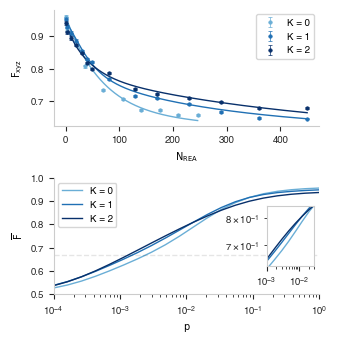

In [5]:
fig_multiplier = 1
fig = plt.figure(figsize = [8.9/2.54 -0.12,8.9/2.54 - 0.05])#,constrained_layout=True)

gs = GridSpec(2, 1, figure=fig)#, hspace = 2)#, hspace = 1, wspace = 0.1)
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])
inset_aspect_ratio_width = "18%"
inset_aspect_ratio_height = "51%"
ax1_inset = inset_axes(ax1, width = inset_aspect_ratio_width, height = inset_aspect_ratio_height, loc = 'center right')

# ax0 = fig.add_subplot(gs[0,1:4])
# ax1 = fig.add_subplot(gs[0,5:8])
# ax00 = fig.add_subplot(gs[0,0])
# ax10 = fig.add_subplot(gs[0,8])

dataset_keys = list(DataDict_xyz_gate.keys())
N_datasets = len(dataset_keys)
color_list_fig4 = cm.Blues(np.linspace(0.5,1,N_datasets)) # ['k','r','b']


find_RO_Str = '{C_{RO}}$:'
for cntr, key in enumerate(dataset_keys):

    # Extract the amount of spectator qubits
    C_RO_str_Idx = key.find(find_RO_Str) + len(find_RO_Str) + 1
    C_RO_str = key[C_RO_str_Idx::]
    N_spectator = C_RO_str.count('C') - 1

    # Define a label for the axes legend
    # label = r'$\mathrm{N_{spec}}$ = ' + str(N_spectator)
    label = r'K = ' + str(N_spectator)

    # For a specific key, extract all the experimental data that is to be plotted
    x_data = DataDict_xyz_gate[key]['x']
    xmax = np.max( [np.max(x_data), np.max(x_data)] )
    y_data = DataDict_xyz_gate[key]['y']
    yerr_data = DataDict_xyz_gate[key]['yerr']
    x_fit = DataDict_xyz_gate[key]['x_fit']
    y_fit = DataDict_xyz_gate[key]['y_fit']

    p_arr = DataDict_xyz_gate[key]['p_arr']
    fidelity_arr = DataDict_xyz_gate[key]['fidelity_arr']
    norm_arr = DataDict_xyz_gate[key]['norm_arr']

    ax0.errorbar(x_data, y_data, yerr_data, color = color_list_fig4[cntr], linestyle = 'none', marker = 'o', label = label,\
                   markersize = markersize_default*fig_multiplier, elinewidth = elinewidht_default*fig_multiplier, capsize = capsize_default*fig_multiplier, markeredgewidth = markeredgewidth_default*fig_multiplier)
    ax0.plot(x_fit, y_fit, color = color_list_fig4[cntr], linewidth = linewidth_default*fig_multiplier)

    ax1.plot(p_arr, fidelity_arr, color = color_list_fig4[cntr], label = label, linewidth = linewidth_default*fig_multiplier)
    ax1_inset.plot(p_arr, fidelity_arr, color = color_list_fig4[cntr], label = label, linewidth = linewidth_default*fig_multiplier)

ax0.set_xlabel(r'$\mathrm{N_{REA}}$')
ax0.set_ylabel(r'$\mathrm{F_{xyz}}$')
ax0.legend()
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)

ax1.set_xscale('log')
ax1.axhline(y = 2./3, c = 'k', alpha = 0.1, linestyle = '--') #, label = 'classical limit')
ax1.set_xlabel(r'$\mathrm{p}$')
ax1.set_ylabel(r'$\mathrm{\overline{F}}$')
ax1.set_xlim([1e-4,1e0])
ax1.legend()
# ax1.fill_between([0.01,1], 1.1, -0., facecolor=color_list_fig4[1], alpha=.1, zorder = 10)
# ax1.fill_between([0.005,1], 1.1, -0., facecolor=color_list_fig4[2], alpha=.1, zorder = 11)
ax1.set_ylim([0.5,1])
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
# ax1.set_yscale('log')

ax1_inset.set_xscale('log')
ax1_inset.set_yscale('log')
ax1_inset.set_xlim([1e-3,3e-2])
ax1_inset.set_ylim([0.63,0.85])

plt.tight_layout()


# FolderPath = r'...' 
# FigName = 'Fig4_figure_experimental_data_TwoRows.pdf'
# FigSavePath = os.path.join(FolderPath,FigName)

# plt.savefig(FigSavePath, bbox_inches='tight')# , transparent=True)